In [1]:
import dask.bag as db
import os
import json
import gzip

b = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=2)
b.take(3)

(1, 2, 3)

In [2]:
from account import account_entries, account_params, json_entries
num_files, n, k = 3, 1000000, 500

data_dir = 'data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
fn = os.path.join(data_dir, 'accounts.%d.csv' % (num_files - 1))
print("Create CSV accounts for dataframe exercise")
args = account_params(k)

for i in range(num_files):
    df = account_entries(n, *args)
    df.to_csv(os.path.join(data_dir, 'accounts.%d.csv' % i),index=False)

Create CSV accounts for dataframe exercise


In [3]:
num_files, n, k = 50, 100000, 500
fn = os.path.join(data_dir, 'accounts.%02d.json.gz' % (num_files - 1))

print("Create JSON accounts for bag exercise")

args = account_params(k)

for i in range(num_files):
    seq = json_entries(n, *args)
    fn = os.path.join(data_dir, 'accounts.%02d.json.gz' % i)
    with gzip.open(fn, 'wb') as f:
        f.write(os.linesep.join(map(json.dumps, seq)).encode())

Create JSON accounts for bag exercise


In [4]:
b = db.read_text(os.path.join(data_dir, 'accounts.*.json.gz'))
b.take(1)

('{"transactions": [{"amount": 177, "transaction-id": 2125}, {"amount": 176, "transaction-id": 2939}, {"amount": 131, "transaction-id": 4706}, {"amount": 206, "transaction-id": 6559}, {"amount": 132, "transaction-id": 7393}, {"amount": 188, "transaction-id": 8415}, {"amount": 137, "transaction-id": 12764}, {"amount": 224, "transaction-id": 13740}, {"amount": 174, "transaction-id": 17800}, {"amount": 217, "transaction-id": 18149}, {"amount": 213, "transaction-id": 18670}, {"amount": 190, "transaction-id": 20862}, {"amount": 252, "transaction-id": 23205}, {"amount": 196, "transaction-id": 24976}, {"amount": 159, "transaction-id": 25885}, {"amount": 166, "transaction-id": 27069}, {"amount": 169, "transaction-id": 31170}, {"amount": 183, "transaction-id": 32907}, {"amount": 134, "transaction-id": 35379}, {"amount": 131, "transaction-id": 39323}, {"amount": 158, "transaction-id": 42341}, {"amount": 112, "transaction-id": 42680}, {"amount": 161, "transaction-id": 42863}, {"amount": 124, "tra

In [5]:
b = db.read_text('s3://dask-data/nyc-taxi/2015/yellow_tripdata_2015-01.csv')
# also can pull from s3

In [6]:
%%time
def is_even(n):
    return n % 2 == 0

b = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
c = b.filter(is_even).map(lambda x: x ** 2)
print(c.compute())

[4, 16, 36, 64, 100]
CPU times: user 12 ms, sys: 36 ms, total: 48 ms
Wall time: 49.7 ms


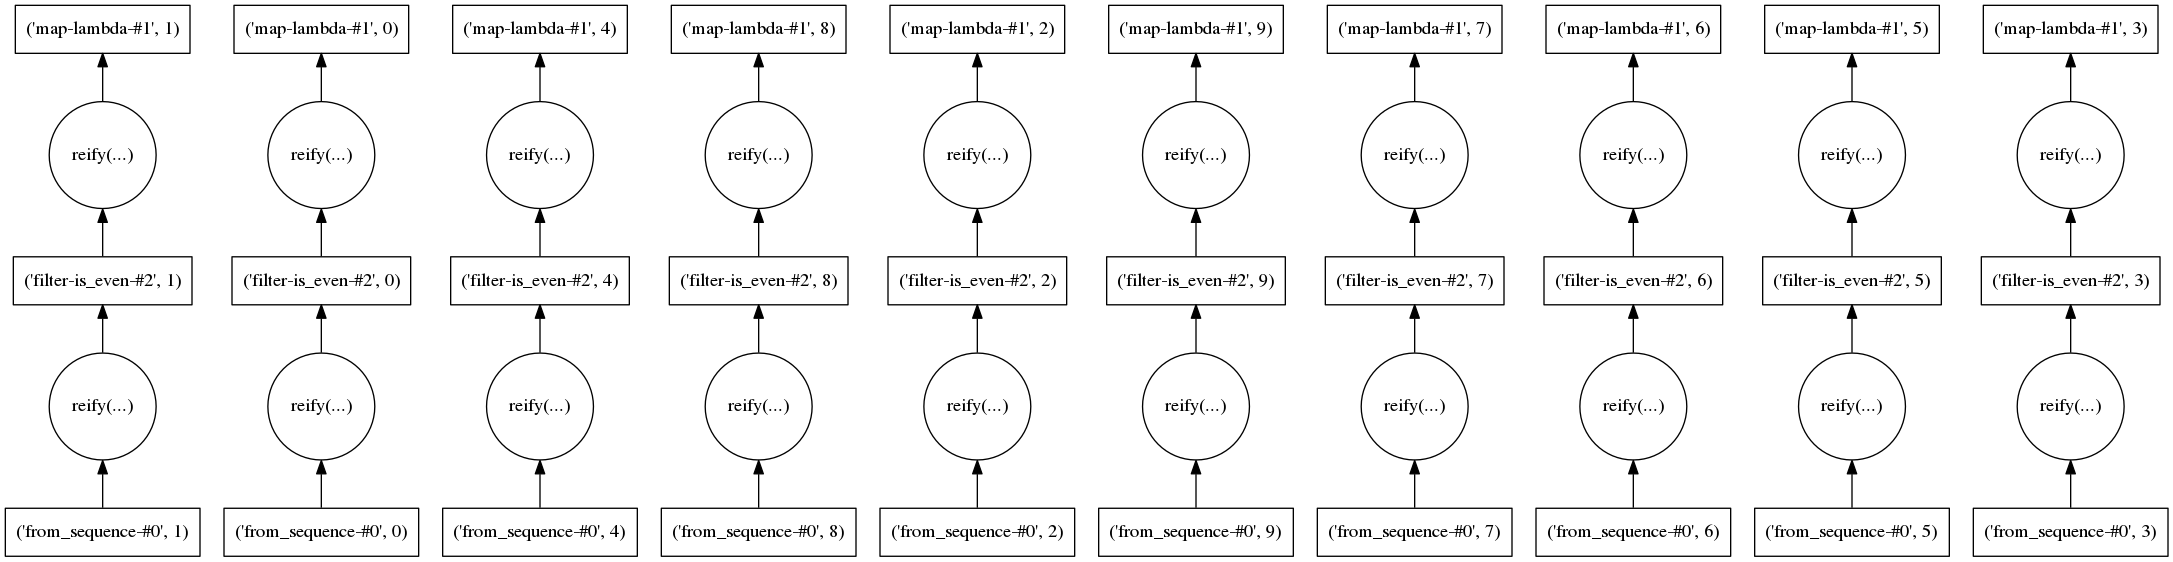

In [7]:
c.visualize()

In [8]:
%%time
b = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print([i**2 for i in b if is_even(i)])

[4, 16, 36, 64, 100]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 50.3 µs


In [9]:
%%time
accounts = []
for i in ['data/'+i for i in os.listdir('data') if i.find('json.gz')>0]:
    with gzip.open(i, 'r') as f:
        accounts.append(f.read().decode('utf-8'))

CPU times: user 672 ms, sys: 36 ms, total: 708 ms
Wall time: 708 ms


In [10]:
%%time
filename = os.path.join('data', 'accounts.*.json.gz')
lines = db.read_text(filename)
print(lines.take(1))

('{"transactions": [{"amount": 177, "transaction-id": 2125}, {"amount": 176, "transaction-id": 2939}, {"amount": 131, "transaction-id": 4706}, {"amount": 206, "transaction-id": 6559}, {"amount": 132, "transaction-id": 7393}, {"amount": 188, "transaction-id": 8415}, {"amount": 137, "transaction-id": 12764}, {"amount": 224, "transaction-id": 13740}, {"amount": 174, "transaction-id": 17800}, {"amount": 217, "transaction-id": 18149}, {"amount": 213, "transaction-id": 18670}, {"amount": 190, "transaction-id": 20862}, {"amount": 252, "transaction-id": 23205}, {"amount": 196, "transaction-id": 24976}, {"amount": 159, "transaction-id": 25885}, {"amount": 166, "transaction-id": 27069}, {"amount": 169, "transaction-id": 31170}, {"amount": 183, "transaction-id": 32907}, {"amount": 134, "transaction-id": 35379}, {"amount": 131, "transaction-id": 39323}, {"amount": 158, "transaction-id": 42341}, {"amount": 112, "transaction-id": 42680}, {"amount": 161, "transaction-id": 42863}, {"amount": 124, "tra

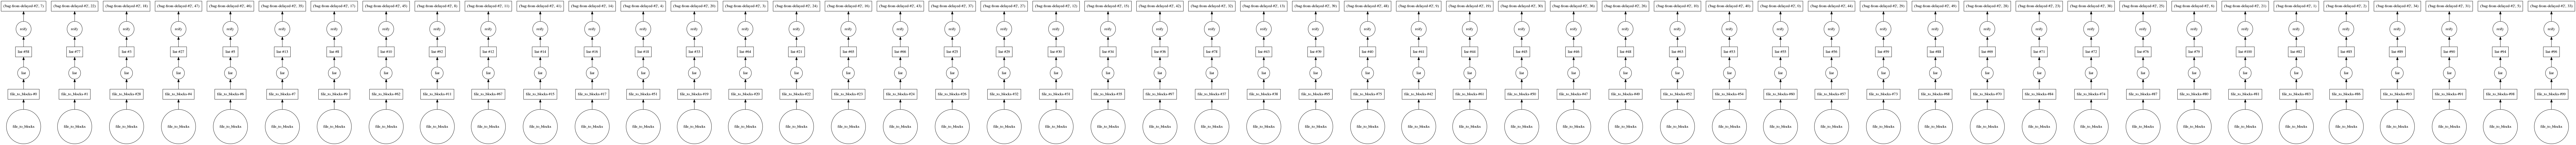

In [11]:
lines.visualize()

In [14]:
%%time
js = lines.map(json.loads)
# take: inspect first few elements
print(js.take(1))

({'transactions': [{'amount': 177, 'transaction-id': 2125}, {'amount': 176, 'transaction-id': 2939}, {'amount': 131, 'transaction-id': 4706}, {'amount': 206, 'transaction-id': 6559}, {'amount': 132, 'transaction-id': 7393}, {'amount': 188, 'transaction-id': 8415}, {'amount': 137, 'transaction-id': 12764}, {'amount': 224, 'transaction-id': 13740}, {'amount': 174, 'transaction-id': 17800}, {'amount': 217, 'transaction-id': 18149}, {'amount': 213, 'transaction-id': 18670}, {'amount': 190, 'transaction-id': 20862}, {'amount': 252, 'transaction-id': 23205}, {'amount': 196, 'transaction-id': 24976}, {'amount': 159, 'transaction-id': 25885}, {'amount': 166, 'transaction-id': 27069}, {'amount': 169, 'transaction-id': 31170}, {'amount': 183, 'transaction-id': 32907}, {'amount': 134, 'transaction-id': 35379}, {'amount': 131, 'transaction-id': 39323}, {'amount': 158, 'transaction-id': 42341}, {'amount': 112, 'transaction-id': 42680}, {'amount': 161, 'transaction-id': 42863}, {'amount': 124, 'tran

In [15]:
os.path.join('data', 'accounts.*.json.gz')

'data/accounts.*.json.gz'

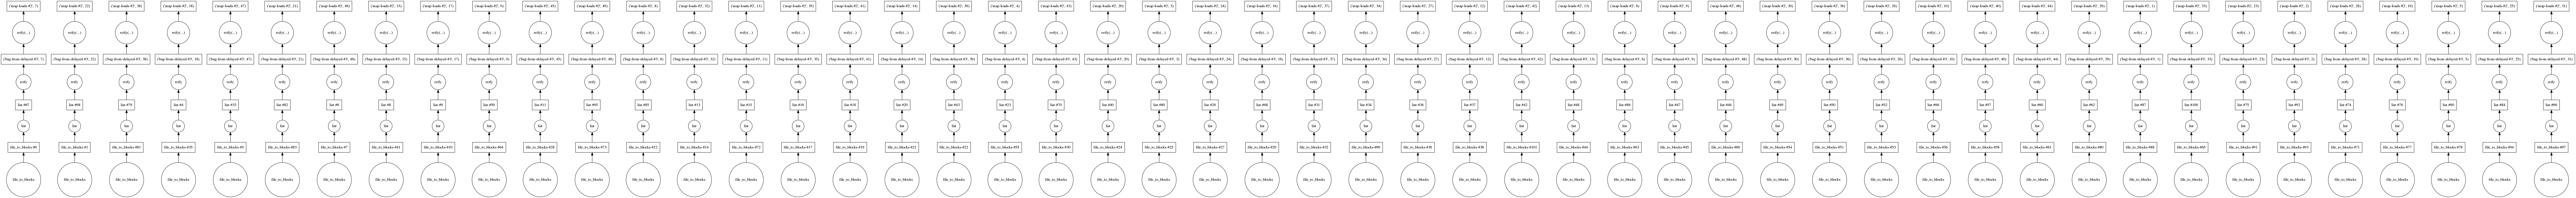

In [16]:
js.visualize()

In [17]:
%%time
js.filter(lambda record: record['name'] == 'Alice').take(1)

CPU times: user 12 ms, sys: 36 ms, total: 48 ms
Wall time: 55.7 ms


({'id': 47,
  'name': 'Alice',
  'transactions': [{'amount': 5, 'transaction-id': 2014},
   {'amount': 5, 'transaction-id': 2376},
   {'amount': 5, 'transaction-id': 4768},
   {'amount': 5, 'transaction-id': 6038},
   {'amount': 5, 'transaction-id': 6600},
   {'amount': 5, 'transaction-id': 7235},
   {'amount': 5, 'transaction-id': 7514},
   {'amount': 5, 'transaction-id': 14040},
   {'amount': 5, 'transaction-id': 14175},
   {'amount': 5, 'transaction-id': 16257},
   {'amount': 5, 'transaction-id': 21402},
   {'amount': 5, 'transaction-id': 22097},
   {'amount': 5, 'transaction-id': 22407},
   {'amount': 5, 'transaction-id': 23987},
   {'amount': 5, 'transaction-id': 26066},
   {'amount': 5, 'transaction-id': 27586},
   {'amount': 5, 'transaction-id': 29206},
   {'amount': 5, 'transaction-id': 29480},
   {'amount': 5, 'transaction-id': 35230},
   {'amount': 5, 'transaction-id': 39875},
   {'amount': 5, 'transaction-id': 43261},
   {'amount': 5, 'transaction-id': 46381},
   {'amount': 

In [20]:
%%time
def count_transactions(d):
    return {'name': d['name'], 'count': len(d['transactions'])}

# map: apply a function to each element
print((js.filter(lambda record: record['name'] == 'Alice').map(count_transactions).take(5)))

({'count': 40, 'name': 'Alice'}, {'count': 662, 'name': 'Alice'}, {'count': 215, 'name': 'Alice'}, {'count': 25, 'name': 'Alice'}, {'count': 9, 'name': 'Alice'})
CPU times: user 16 ms, sys: 32 ms, total: 48 ms
Wall time: 60.2 ms


In [21]:
%%time

print((js.filter(lambda record: record['name'] == 'Alice')
   .map(count_transactions)
   .pluck('count')
   .take(5)))

(40, 662, 215, 25, 9)
CPU times: user 4 ms, sys: 44 ms, total: 48 ms
Wall time: 60.1 ms


In [22]:
%%time

print((js.filter(lambda record: record['name'] == 'Alice')
   .map(count_transactions)
   .pluck('count')
   .mean()
   .compute()))

158.0168
CPU times: user 64 ms, sys: 52 ms, total: 116 ms
Wall time: 1.14 s


In [24]:
%%time
print(js.filter(lambda record: record['name'] == 'Alice').pluck('transactions').take(3))

([{'amount': 5, 'transaction-id': 2014}, {'amount': 5, 'transaction-id': 2376}, {'amount': 5, 'transaction-id': 4768}, {'amount': 5, 'transaction-id': 6038}, {'amount': 5, 'transaction-id': 6600}, {'amount': 5, 'transaction-id': 7235}, {'amount': 5, 'transaction-id': 7514}, {'amount': 5, 'transaction-id': 14040}, {'amount': 5, 'transaction-id': 14175}, {'amount': 5, 'transaction-id': 16257}, {'amount': 5, 'transaction-id': 21402}, {'amount': 5, 'transaction-id': 22097}, {'amount': 5, 'transaction-id': 22407}, {'amount': 5, 'transaction-id': 23987}, {'amount': 5, 'transaction-id': 26066}, {'amount': 5, 'transaction-id': 27586}, {'amount': 5, 'transaction-id': 29206}, {'amount': 5, 'transaction-id': 29480}, {'amount': 5, 'transaction-id': 35230}, {'amount': 5, 'transaction-id': 39875}, {'amount': 5, 'transaction-id': 43261}, {'amount': 5, 'transaction-id': 46381}, {'amount': 5, 'transaction-id': 52482}, {'amount': 5, 'transaction-id': 52930}, {'amount': 5, 'transaction-id': 62249}, {'amo

In [28]:
%%time
print((js.filter(lambda record: record['name'] == 'Alice')
   .pluck('transactions')
   .flatten()
   .take(3)))

({'amount': 5, 'transaction-id': 2014}, {'amount': 5, 'transaction-id': 2376}, {'amount': 5, 'transaction-id': 4768})
CPU times: user 20 ms, sys: 56 ms, total: 76 ms
Wall time: 90 ms


In [32]:
%%time
print((js.filter(lambda record: record['name'] == 'Alice')
   .pluck('transactions')
   .flatten()
   .pluck('amount')
   .take(3)))

(5, 5, 5)
CPU times: user 8 ms, sys: 40 ms, total: 48 ms
Wall time: 56.9 ms


In [33]:
%%time
print((js.filter(lambda record: record['name'] == 'Alice')
   .pluck('transactions')
   .flatten()
   .pluck('amount')
   .mean()
   .compute()))

749.4042861265384
CPU times: user 68 ms, sys: 44 ms, total: 112 ms
Wall time: 1.24 s


In [44]:
%%time
d={}
for word in ['Alice', 'Bob', 'Charlie', 'Dan', 'Edith', 'Frank']:
    d.setdefault(len(word), []).append(word)

result=[(len(d[n][0]),d[n]) for n in sorted(d, reverse=True)] 
print(result)

[(7, ['Charlie']), (5, ['Alice', 'Edith', 'Frank']), (3, ['Bob', 'Dan'])]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 40.5 µs


In [45]:
%%time
b = db.from_sequence(['Alice', 'Bob', 'Charlie', 'Dan', 'Edith', 'Frank'])
print(b.groupby(len).compute())

[(7, ['Charlie']), (3, ['Bob', 'Dan']), (5, ['Alice', 'Edith', 'Frank'])]
CPU times: user 12 ms, sys: 80 ms, total: 92 ms
Wall time: 198 ms


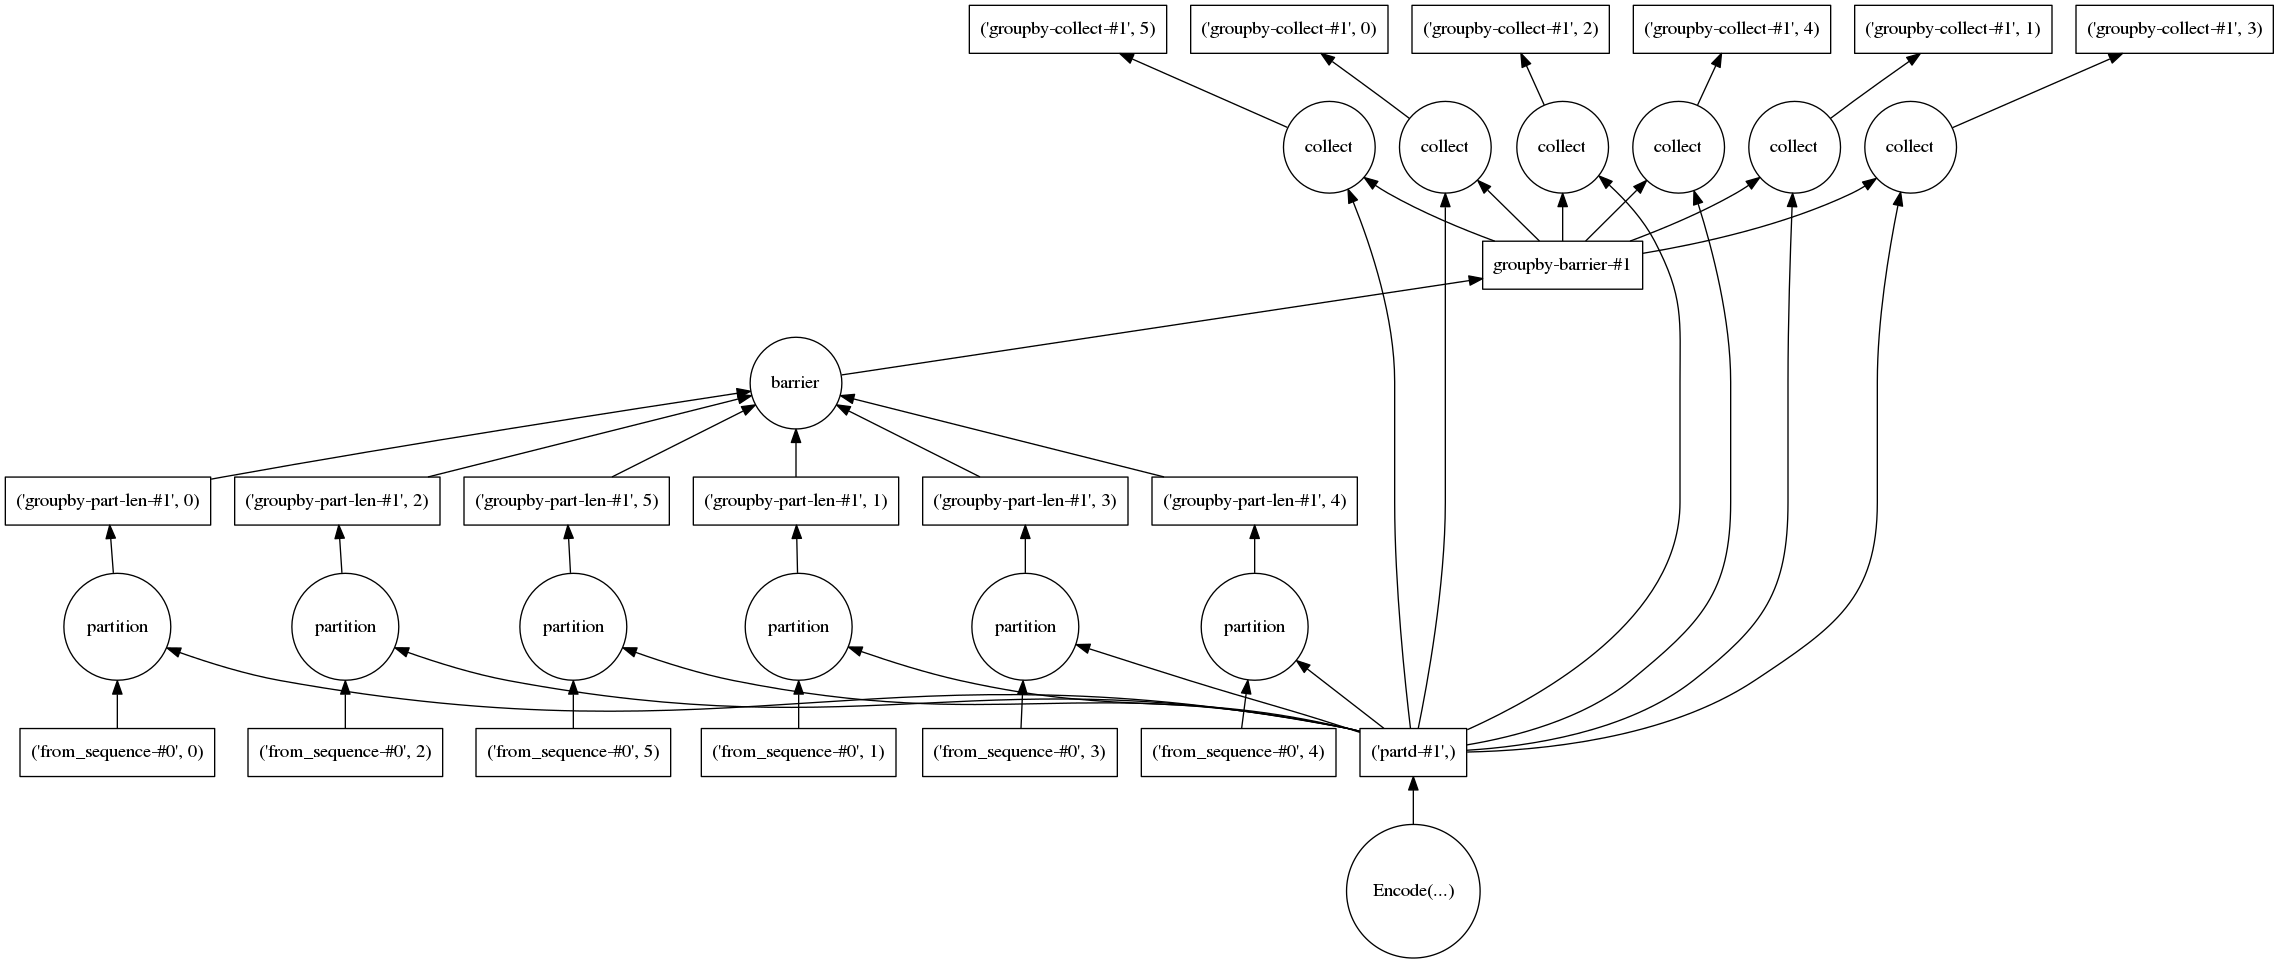

In [47]:
b.groupby(len).visualize()

In [49]:
%%time
b = db.from_sequence(list(range(10)))
print(b.groupby(lambda x: x % 2).compute())

[(0, [0, 2, 4, 6, 8]), (1, [3, 1, 5, 7, 9])]
CPU times: user 20 ms, sys: 84 ms, total: 104 ms
Wall time: 245 ms


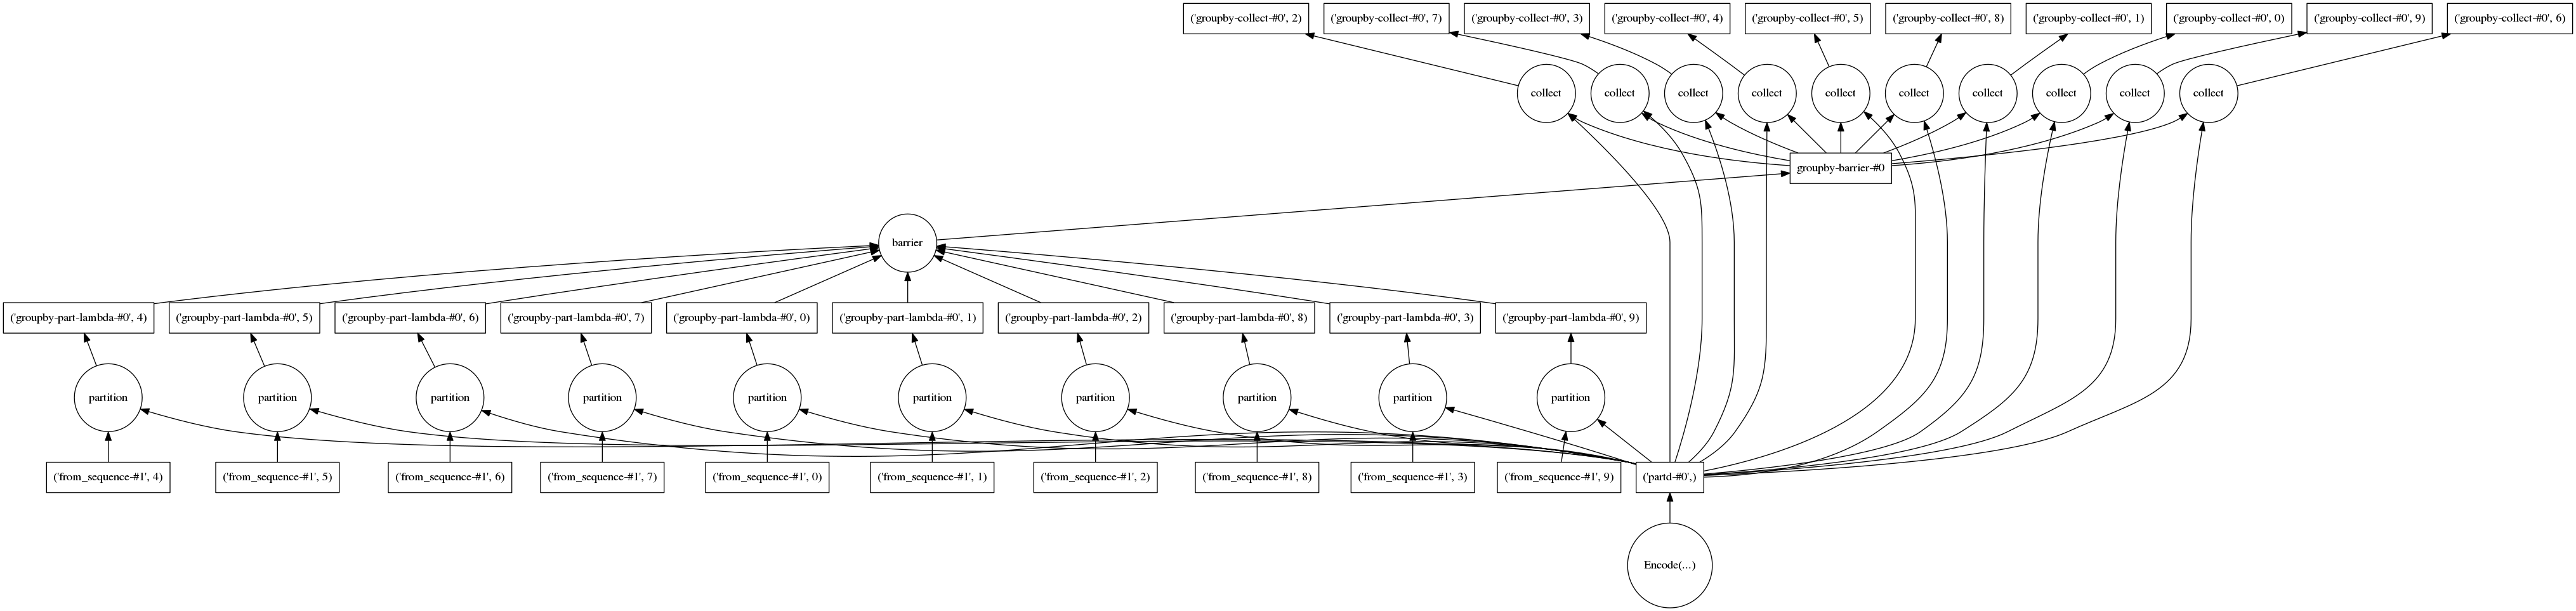

In [50]:
b.groupby(lambda x: x % 2).visualize()

In [51]:
%%time
d={}
for no in list(range(10)):
    d.setdefault(no % 2, []).append(no)

result=[(d[n][0]%2,d[n]) for n in sorted(d, reverse=True)] 
print(result)

[(1, [1, 3, 5, 7, 9]), (0, [0, 2, 4, 6, 8])]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 173 µs


In [52]:
%%time
print(b.groupby(lambda x: x % 2).starmap(lambda k, v: (k, max(v))).compute())

[(0, 8), (1, 9)]
CPU times: user 28 ms, sys: 76 ms, total: 104 ms
Wall time: 255 ms


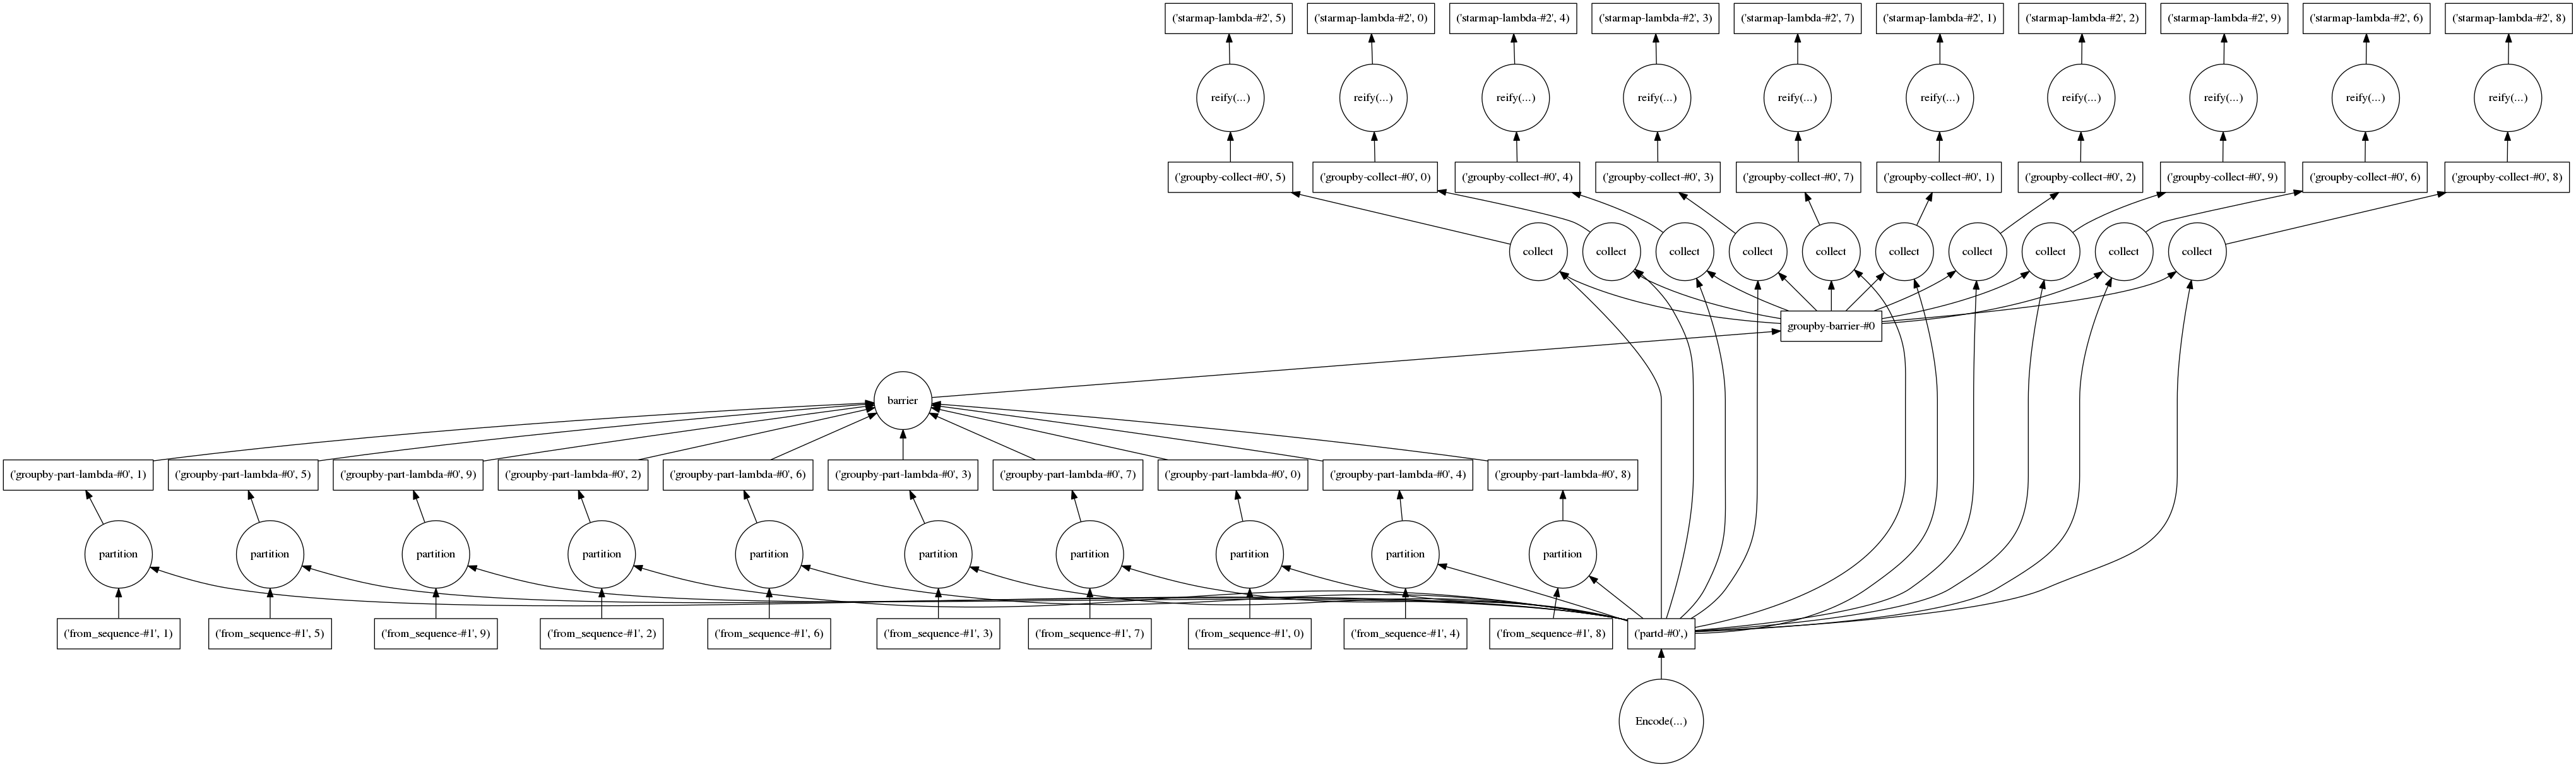

In [62]:
b.groupby(lambda x: x % 2).starmap(lambda k, v: (k, max(v))).visualize()

In [61]:
%%time
d={}
for no in list(range(10)):
    d.setdefault(no % 2, []).append(no)
    
print([(k, max(v)) for k, v in [(d[n][0]%2,d[n]) for n in sorted(d, reverse=True)]])

[(1, 9), (0, 8)]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 57.7 µs


In [64]:
%%time
is_even = lambda x: x % 2
print(b.foldby(is_even, binop=max, combine=max).compute())

[(0, 8), (1, 9)]
CPU times: user 12 ms, sys: 80 ms, total: 92 ms
Wall time: 90.9 ms


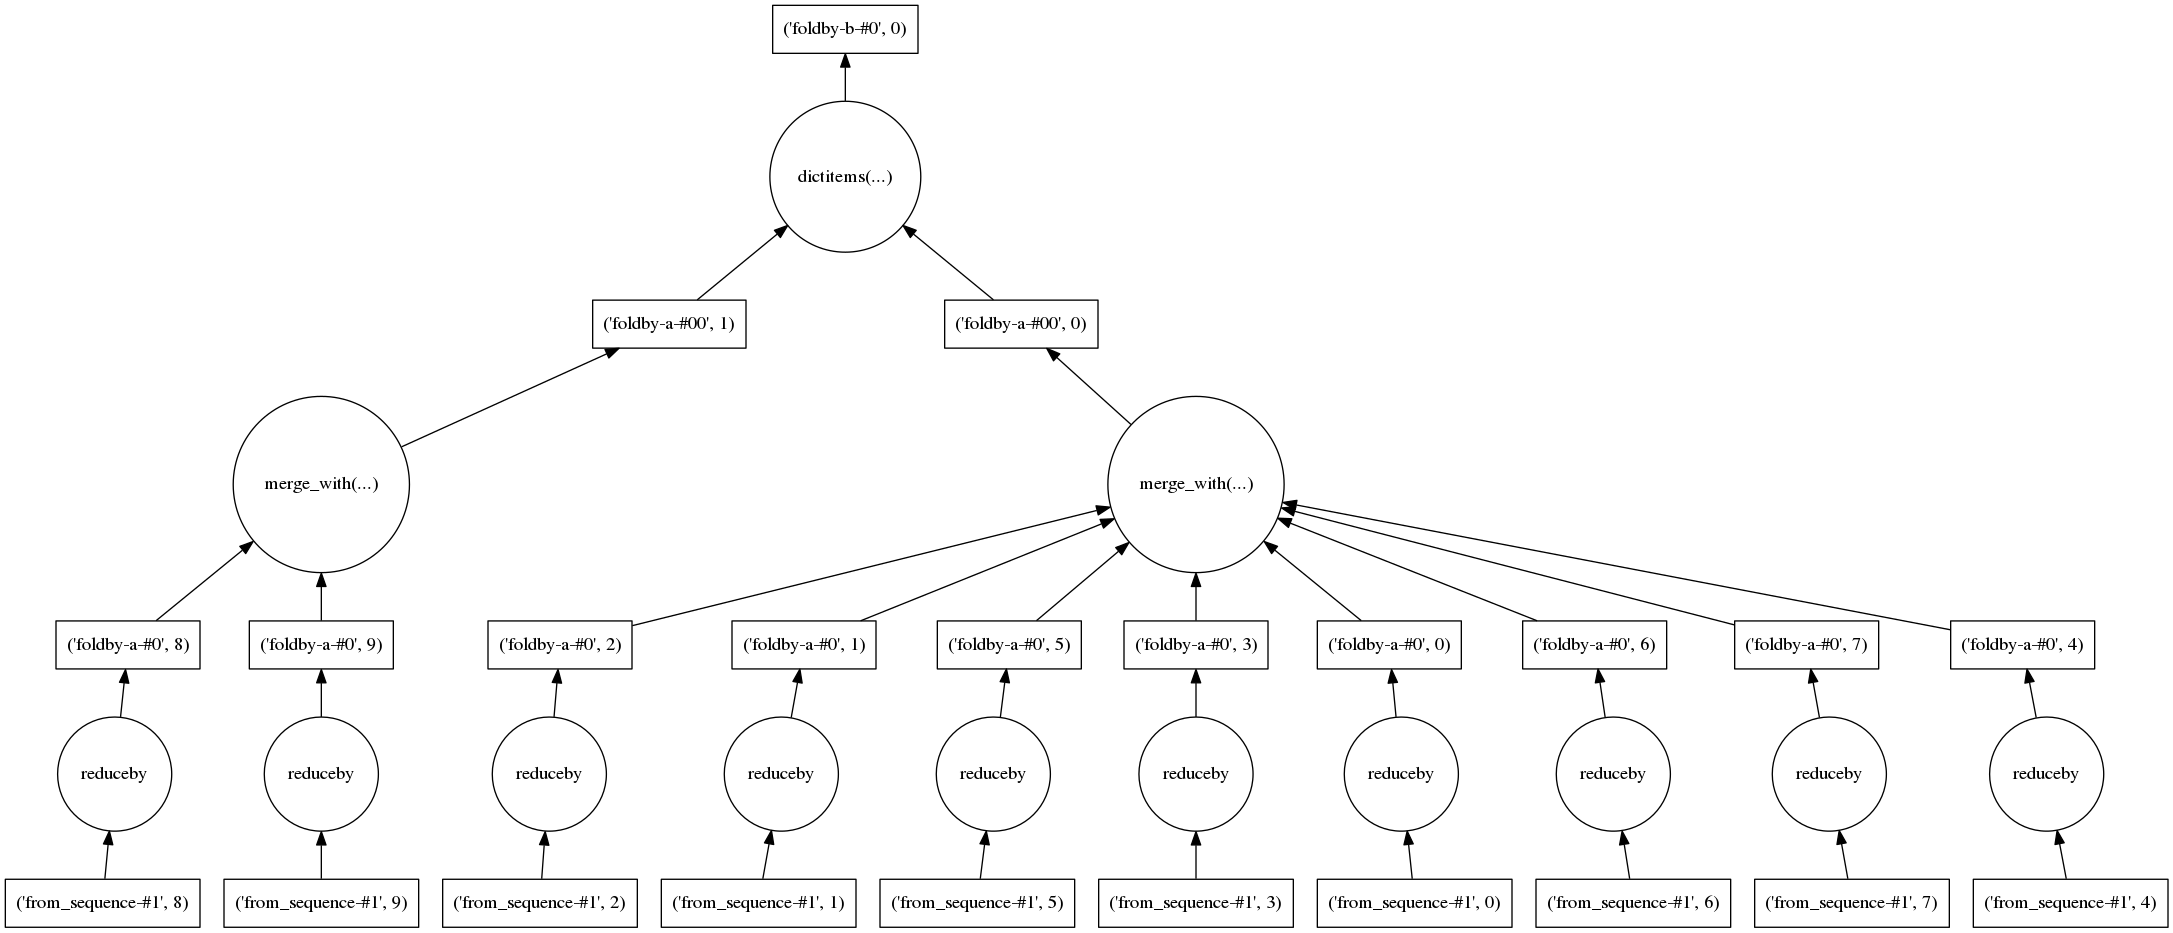

In [65]:
b.foldby(is_even, binop=max, combine=max).visualize()

In [66]:
%%time
result = js.groupby(lambda item: item['name']).starmap(lambda k, v: (k, len(v))).compute()
print(sorted(result))

[('Alice', 1250), ('Bob', 593), ('Charlie', 1200), ('Dan', 896), ('Edith', 850), ('Frank', 750), ('George', 800), ('Hannah', 750), ('Ingrid', 1200), ('Jerry', 700), ('Kevin', 1050), ('Laura', 1150), ('Michael', 850), ('Norbert', 800), ('Oliver', 900), ('Patricia', 974), ('Quinn', 950), ('Ray', 1100), ('Sarah', 999), ('Tim', 1400), ('Ursula', 750), ('Victor', 850), ('Wendy', 950), ('Xavier', 1250), ('Yvonne', 950), ('Zelda', 983)]
CPU times: user 1min 42s, sys: 268 ms, total: 1min 42s
Wall time: 1min 57s


In [67]:
%%time
# This one is comparatively fast and produces the same result.
from operator import add
def incr(tot, _):
    return tot+1

result = js.foldby(key='name', 
                   binop=incr, 
                   initial=0, 
                   combine=add, 
                   combine_initial=0).compute()
print(sorted(result))

[('Alice', 1250), ('Bob', 593), ('Charlie', 1200), ('Dan', 896), ('Edith', 850), ('Frank', 750), ('George', 800), ('Hannah', 750), ('Ingrid', 1200), ('Jerry', 700), ('Kevin', 1050), ('Laura', 1150), ('Michael', 850), ('Norbert', 800), ('Oliver', 900), ('Patricia', 974), ('Quinn', 950), ('Ray', 1100), ('Sarah', 999), ('Tim', 1400), ('Ursula', 750), ('Victor', 850), ('Wendy', 950), ('Xavier', 1250), ('Yvonne', 950), ('Zelda', 983)]
CPU times: user 76 ms, sys: 84 ms, total: 160 ms
Wall time: 1.29 s


In [68]:
df1 = js.to_dataframe()
df1.head()

,id,name,transactions
0,0,Victor,"[{'amount': 177, 'transaction-id': 2125}, {'am..."
1,1,Zelda,"[{'amount': 314, 'transaction-id': 7888}, {'am..."
2,2,Michael,"[{'amount': 1458, 'transaction-id': 933}, {'am..."
3,3,Dan,"[{'amount': 1435, 'transaction-id': 1040}, {'a..."
4,4,Ray,"[{'amount': 1124, 'transaction-id': 803}, {'am..."


In [69]:
%time df1.groupby('name').id.count().compute().head()

CPU times: user 5.63 s, sys: 236 ms, total: 5.87 s
Wall time: 4.42 s


name
Alice      1250
Bob         593
Charlie    1200
Dan         896
Edith       850
Name: id, dtype: int64

In [71]:
%time
def denormalize(record):
    return [{'id': record['id'], 
             'name': record['name'], 
             'amount': transaction['amount'], 
             'transaction-id': transaction['transaction-id']}
            for transaction in record['transactions']]

transactions = js.map(denormalize).flatten()
transactions.take(3)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


({'amount': 177, 'id': 0, 'name': 'Victor', 'transaction-id': 2125},
 {'amount': 176, 'id': 0, 'name': 'Victor', 'transaction-id': 2939},
 {'amount': 131, 'id': 0, 'name': 'Victor', 'transaction-id': 4706})

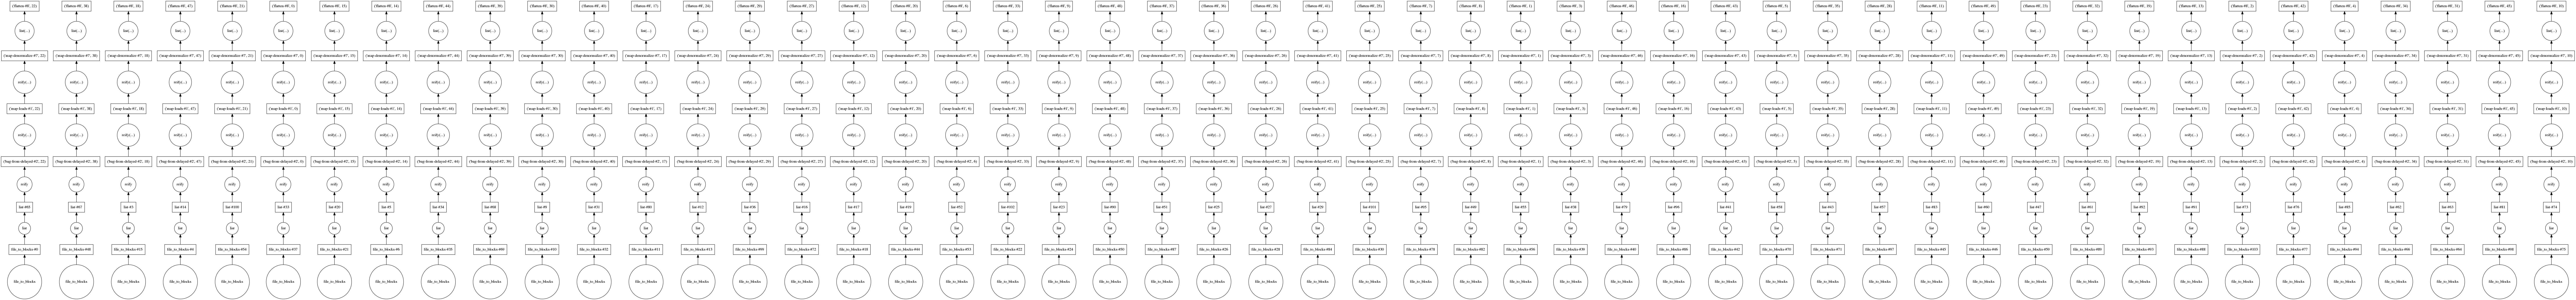

In [72]:
transactions.visualize()

In [73]:
df = transactions.to_dataframe()
df.head()

,amount,id,name,transaction-id
0,177,0,Victor,2125
1,176,0,Victor,2939
2,131,0,Victor,4706
3,206,0,Victor,6559
4,132,0,Victor,7393


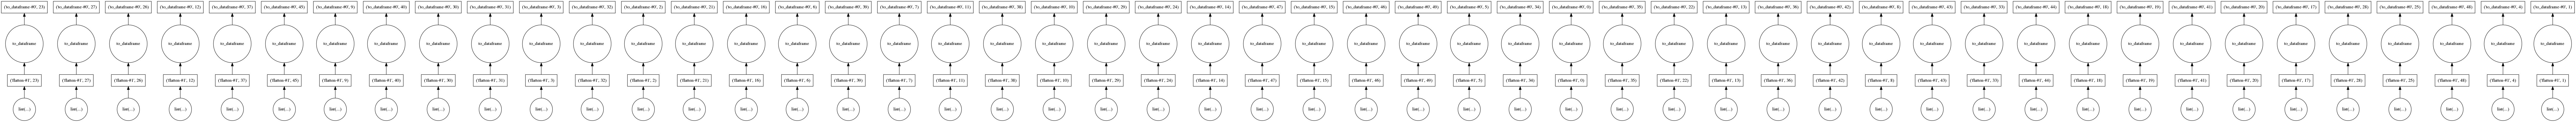

In [74]:
transactions.to_dataframe().visualize()

In [75]:
%time
# number of transactions per name
# note that the time here includes the data load and ingestion
df.groupby('name')['transaction-id'].count().compute()

CPU times: user 11.2 s, sys: 364 ms, total: 11.5 s
Wall time: 9.47 s


name
Alice       197521
Bob          81237
Charlie     308184
Dan         135906
Edith       163184
Frank       101690
George      238678
Hannah      126713
Ingrid      218279
Jerry       207436
Kevin       267123
Laura       240581
Michael     171599
Norbert     265244
Oliver      157936
Patricia    242698
Quinn       240420
Ray         249009
Sarah       110008
Tim         269965
Ursula      120332
Victor      115699
Wendy       147190
Xavier      138864
Yvonne      212006
Zelda       272498
Name: transaction-id, dtype: int64